In [27]:
import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [34]:
# todo check later what is going on
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

In [42]:
# read
data = pd.read_csv('..\data\ex1data1.txt', header=None)


In [43]:
# gradient descent setup
y = np.row_stack(data.values[:, 1])
m = len(y)
X = np.column_stack((np.ones((m,1)), data.values[:, 0])) # add ones column to input for the parameter theta 0
iterations = 1500
alpha = 0.01
theta = np.zeros((2,1))


In [44]:
# computing the cost J(theta)
def compute_cost(X, y, theta):
    m = len(y)
    pred_y = np.dot(X, theta)
    diff = pred_y - y
    J = np.sum(diff ** 2) / (2 * m)
    return J


In [45]:
#gradient descent
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    J_history = np.zeros((iterations, 1))
    for i in range(iterations):
        diff = np.dot(X, theta) - y
        theta = theta - alpha/m * np.dot(X.transpose(), diff)
        J_history[i] = compute_cost(X, y, theta)
    return theta, J_history

In [46]:
theta, J_history = gradient_descent(X, y, theta, alpha, iterations)

Text(0, 0.5, 'Profit in $10,000s')

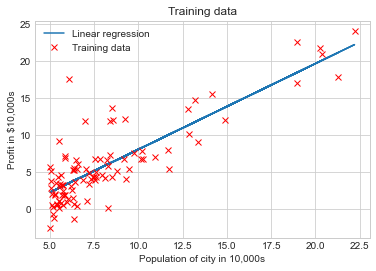

In [47]:
# plot

x_values = data.values[:, 0]
y_values = data.values[:, 1]

%matplotlib inline

plt.style.use('seaborn-whitegrid')
plt.plot(X[:,1], np.dot(X, theta), label='Linear regression')
plt.plot(x_values, y_values, "x", color = "red", label='Training data')
plt.legend()
plt.title("Training data")
plt.xlabel("Population of city in 10,000s")
plt.ylabel("Profit in $10,000s")

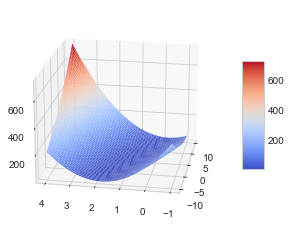

In [303]:
# visualize J theta

thetha0_values = np.linspace(-10, 10, num=100)
thetha1_values = np.linspace(-1, 4, num=100)

J_vals = np.zeros((len(thetha0_values), len(thetha1_values)))

for i in range(len(thetha0_values)):
    for j in range(len(thetha1_values)):
        t = [[thetha0_values[i]],[thetha1_values[j]]]
        J_vals[i,j] = compute_cost(X,y,t)


        
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# surface plot
thetha0_values, thetha1_values = np.meshgrid(thetha0_values, thetha1_values)
J_vals = J_vals.transpose()

surf = ax.plot_surface(thetha0_values, thetha1_values, J_vals, cmap=cm.coolwarm,
               linewidth=0, antialiased=True)
fig.colorbar(surf, shrink=0.5, aspect=5)


ax.view_init(20, 190)


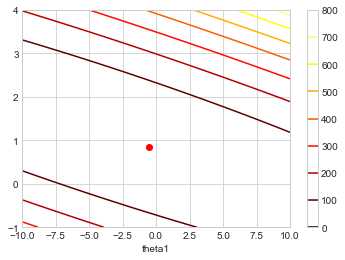

In [311]:
# contour plot
fig1,ax1 = plt.subplots(1,1)
cp = ax1.contour(thetha0_values, thetha1_values, J_vals, cmap = plt.get_cmap("hot"))
fig1.colorbar(cp)
ax1.set_xlabel("theta0")
ax1.set_xlabel("theta1")
ax1.plot(theta[0], theta[1], "or")
plt.show()